# <a name="0">Table of Content</a>


1. <a href="#0">import libraries</a>
2. <a href="#0">Read the dataset</a>
3. <a href="#2">Data investigation</a>
4. <a href="#3">Data preprocessing and Features transformation </a>
5. <a href="#4">Dimensionality Reduction </a>
6. <a href="#5">Performance Metrics</a>
7. <a href="#5">Clustring Algorithms</a>
8. <a href="#6">Anomaly detection algorithm</a>
8. <a href="#6">References</a>



## 1. <a name="1">import libraries</a>



In [298]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import  silhouette_score
from sklearn.preprocessing import *
warnings.filterwarnings("ignore")

## 2. <a name="1">Read the dataset</a>


In [172]:
data_path = 'CC_GENERAL.csv'  
df = pd.read_csv(data_path)
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [173]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

## 3. <a name="2">Data investigation</a>

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>



In [106]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Observations
- We have 8950 rows and 18 columns
- We have float64(14), int64(3), object(1)
- CREDIT_LIMIT ,MINIMUM_PAYMENTS fields have  null values

**describe data**

In [107]:
# This will print basic statistics for numerical columns
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

**Checking for Duplicates**

In [108]:
# df[df.duplicated()].sum()
df.duplicated(subset=None, keep='first')


0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

- No Duplicates present in the dataframe

**Checking for Null**

In [109]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- CREDIT_LIMIT ,MINIMUM_PAYMENTS fields have  null values

**Using box plot to check for outliers**

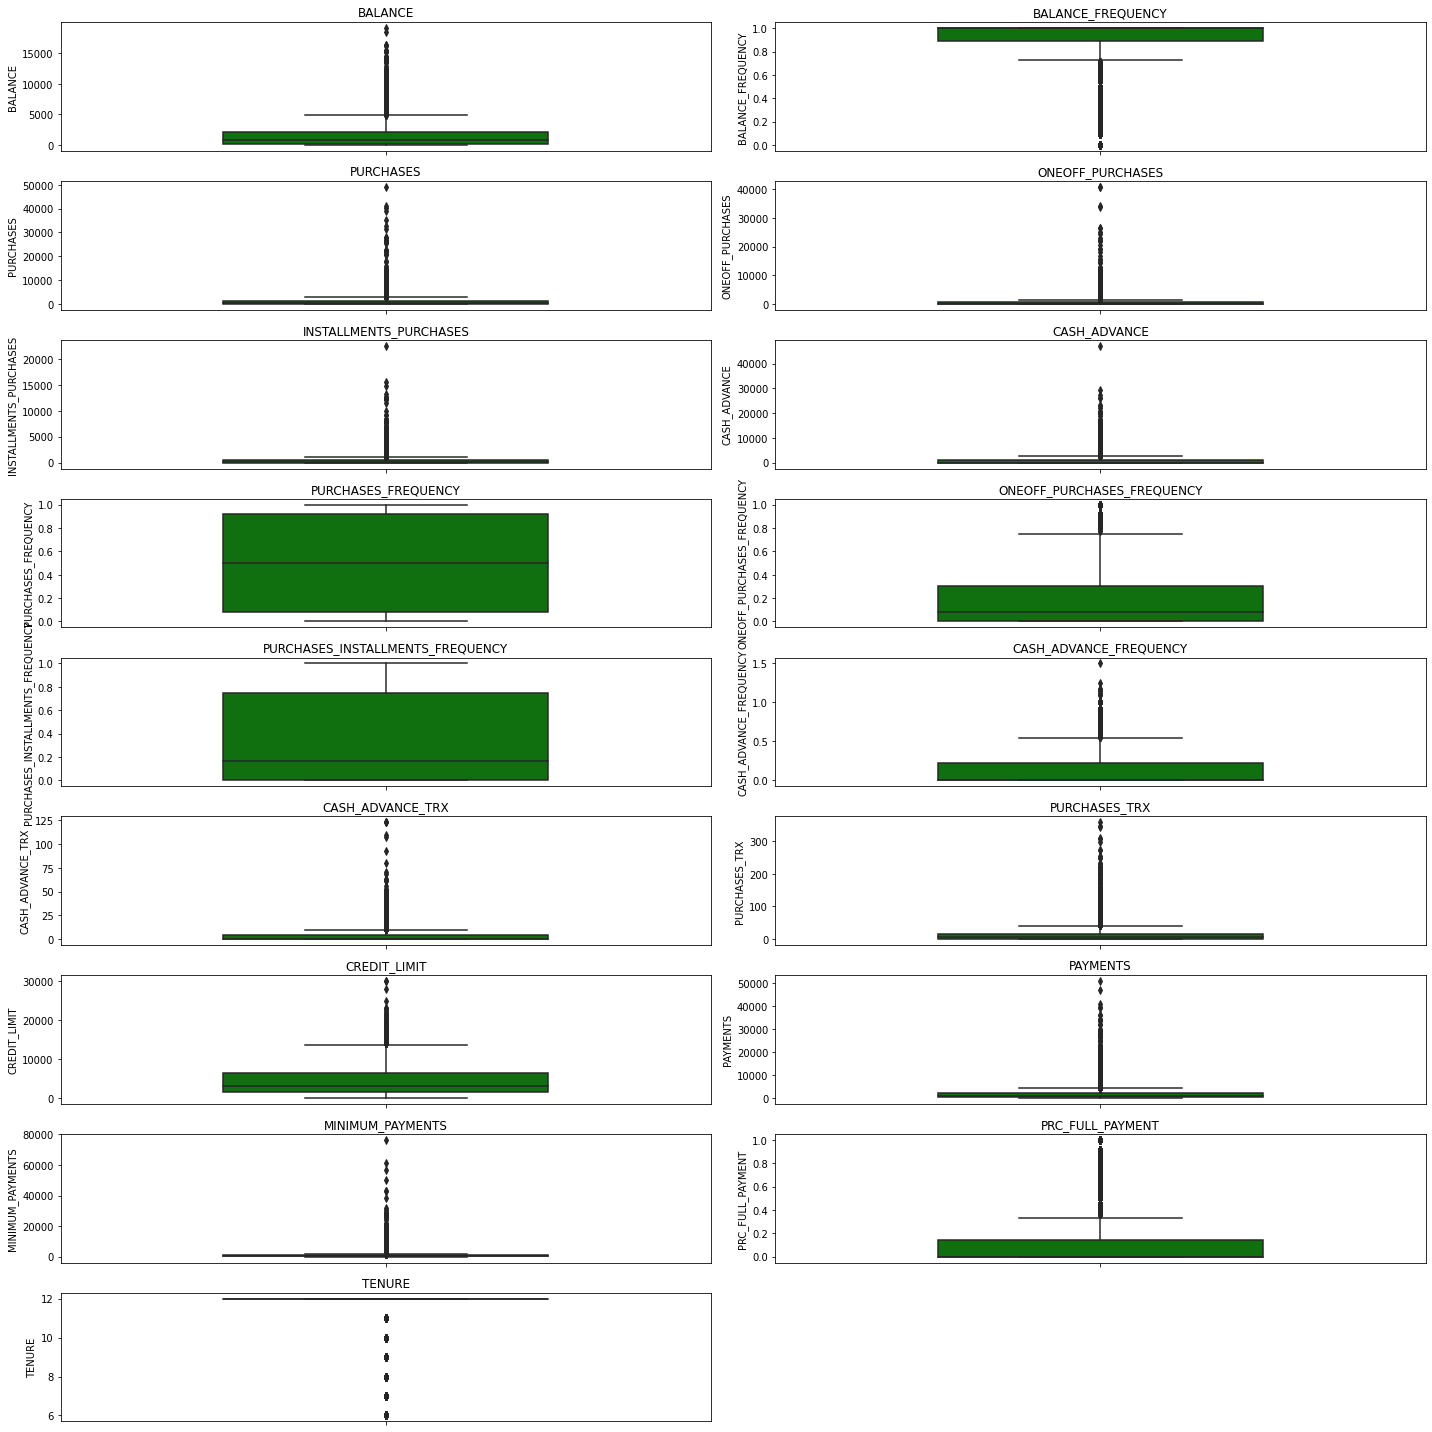

In [177]:
plt.figure(figsize = (20,20))
Col_box = df.columns
for i in range(len(Col_box)):
    plt.subplot(9,2, i + 1)
    sns.boxplot(y = df[Col_box[i]], data = df,color="g",width=0.5)
    plt.title(Col_box[i])
    plt.tight_layout()
    

Almost all columns have outliers

**Checking the distribution of data**

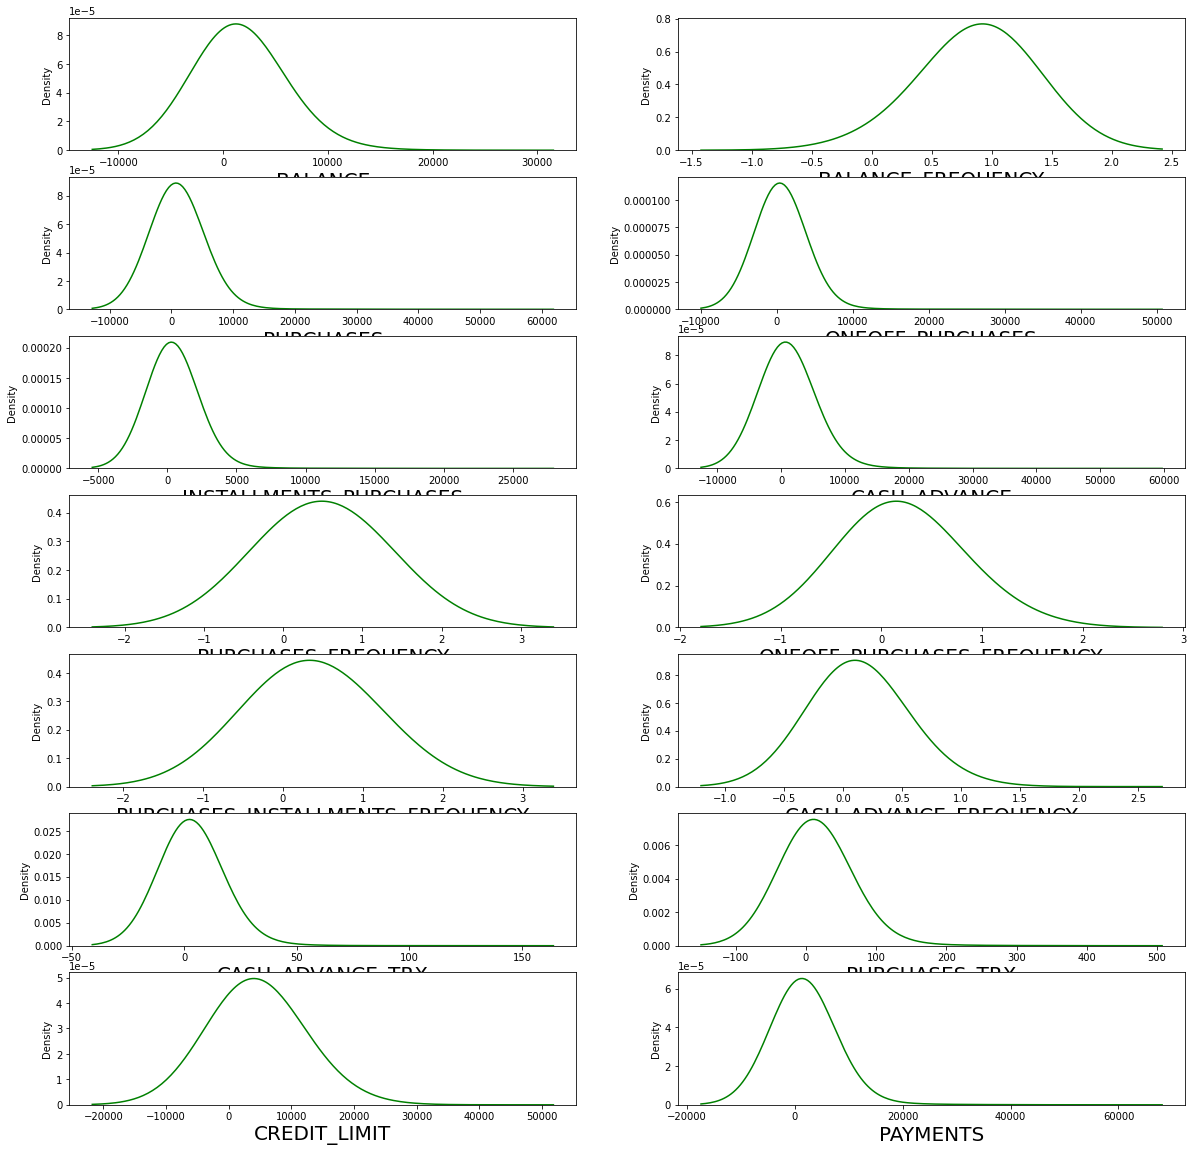

In [178]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1
for c in df:
    if plotnumber<=14 :
        ax = plt.subplot(7,2,plotnumber)
        sns.kdeplot(df[c],bw=2,color='g')
        plt.xlabel(c,fontsize=20)
    plotnumber+=1
plt.show()

There is a lot of right skeweness in some of the features

## 4. <a name="3">Data preprocessing and Features transformation</a>



### Define below all the issues that you had found in the previous part
*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

we many feature transformations scaling techniques:
- MinMax Scaler
- Standard Scaler
- MaxAbsScaler
- Robust Scaler
- Quantile Transformer Scaler
- Log Transformation


##### 1-first we drop CUST_ID column because not important in our investgation

In [176]:
df.drop('CUST_ID', axis=1, inplace=True)

In [111]:
df.shape

(8950, 17)

##### 2- we have two columns have null values  CREDIT_LIMIT --> 1  MINIMUM_PAYMENTS --> 313 row has null value 
##### I  fillna MINIMUM_PAYMENTS  with mean and drop row of CREDIT_LIMIT 

In [179]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [180]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [181]:
df.dropna(inplace=True)

In [182]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [118]:
df.shape

(8949, 17)

#### Removing Outliers using  Interquartile Range 
The interquartile range is considered to be a robust statistic because it is not distorted by outliers like the average (or mean).

In [146]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range




In [183]:
colu = df.columns
for i in colu:
    lower_range, upper_range = detect_outliers(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range,df[i])
    df[i] = np.where(df[i] < lower_range, lower_range,df[i])

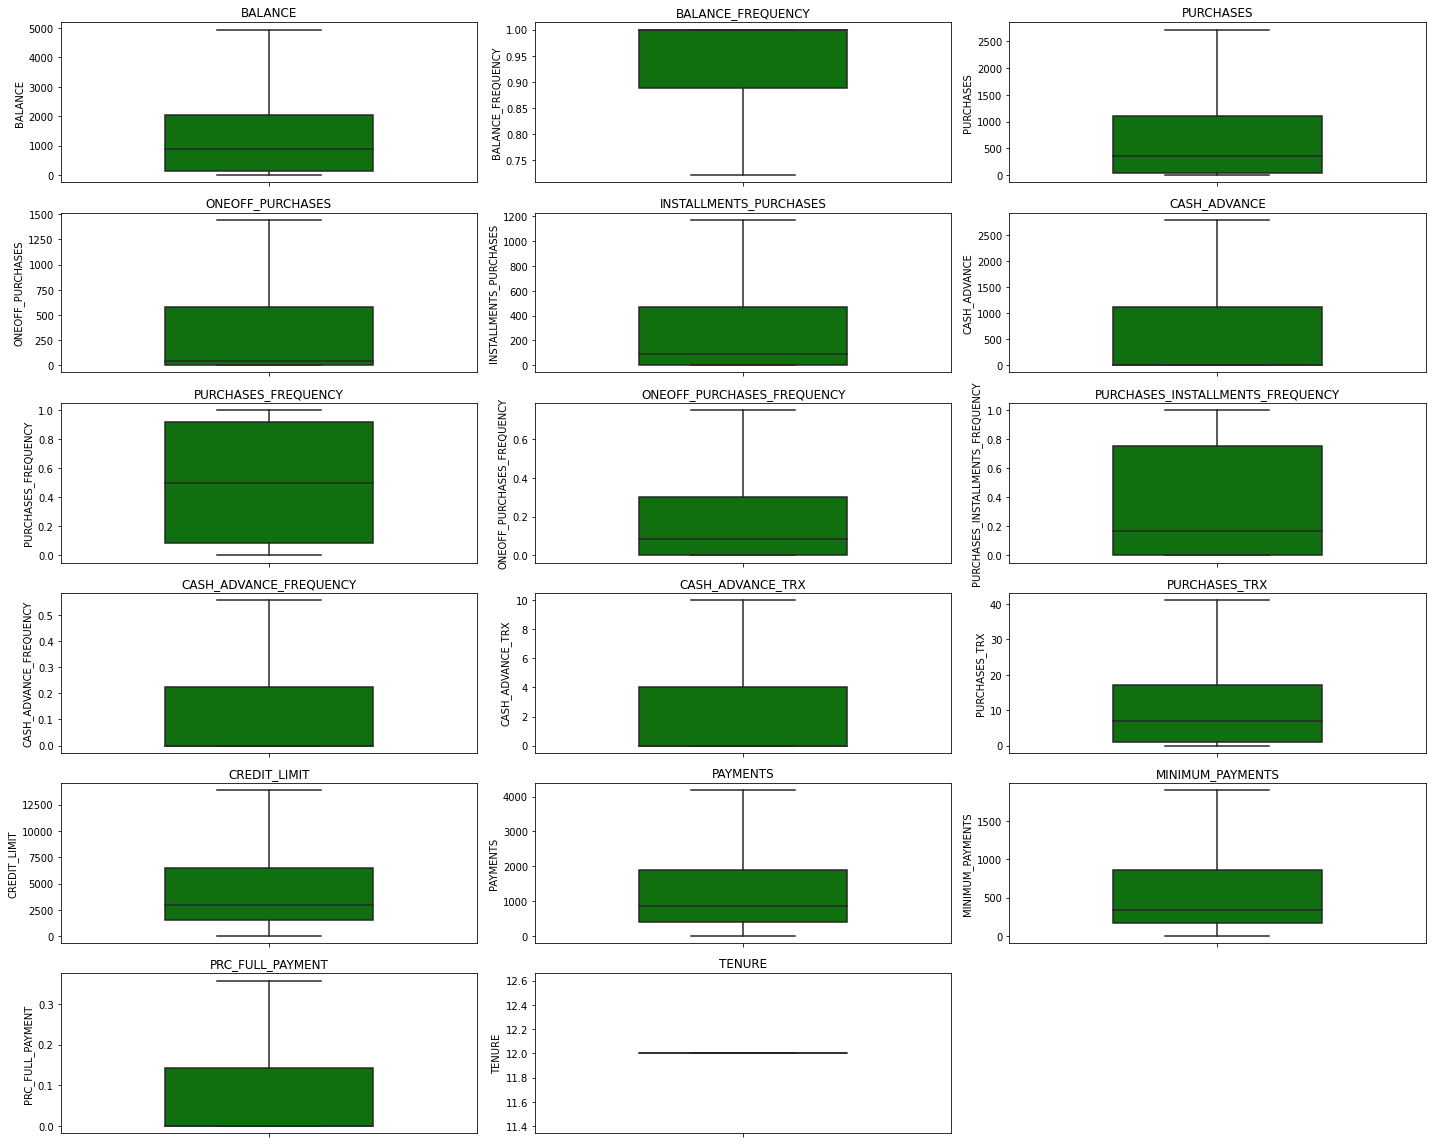

In [184]:
plt.figure(figsize = (20,16))
columns_box = df.columns
for i in range(len(columns_box)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = df[columns_box[i]], data = df,color="g",width=0.5)
    plt.title(columns_box[i])
    plt.tight_layout()

In [185]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40             0.000   
1     3202.467416           0.909091       0.00             0.000   
2     2495.148862           1.000000     773.17           773.170   
3     1666.670542           0.722223    1499.00          1444.575   
4      817.714335           1.000000      16.00            16.000   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12             0.000   
8946    19.183215           1.000000     300.00             0.000   
8947    23.398673           0.833333     144.40             0.000   
8948    13.457564           0.833333       0.00             0.000   
8949   372.708075           0.722223    1093.25          1093.250   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   2784.671635             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       0.750000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000    12.0  
1     4103.032597       1072.340217          0.222222    12.0  
2      622.066742        627.284787          0.000000    12.0  
3        0.000000        864.206542          0.000000    12.0  
4      678.334763        244.791237          0.000000    12.0  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.357143    12.0  
8946   275.861322        864.206542          0.000000    12.0  
8947    81

becuse  i cleaned my data from outlaiers i am not use  Robust Scaler
i will use Log Transformation for skweing 
i can use MinMax Scaler It just scales all the data between 0 and 1
but i am not this range so i use Standard Scaler and is the best for my data becuse it  assumes that the distribution of the variable is normal 

### Log Transform
The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

Handling Skewed data by Using log transformation</br>
- transform skewed distribution to a normal distribution
##### I add a constant (1) to all value to ensure all values in all coumns > 1

In [186]:

for c in df.columns:
    df[c] = np.log(df[c]+1)


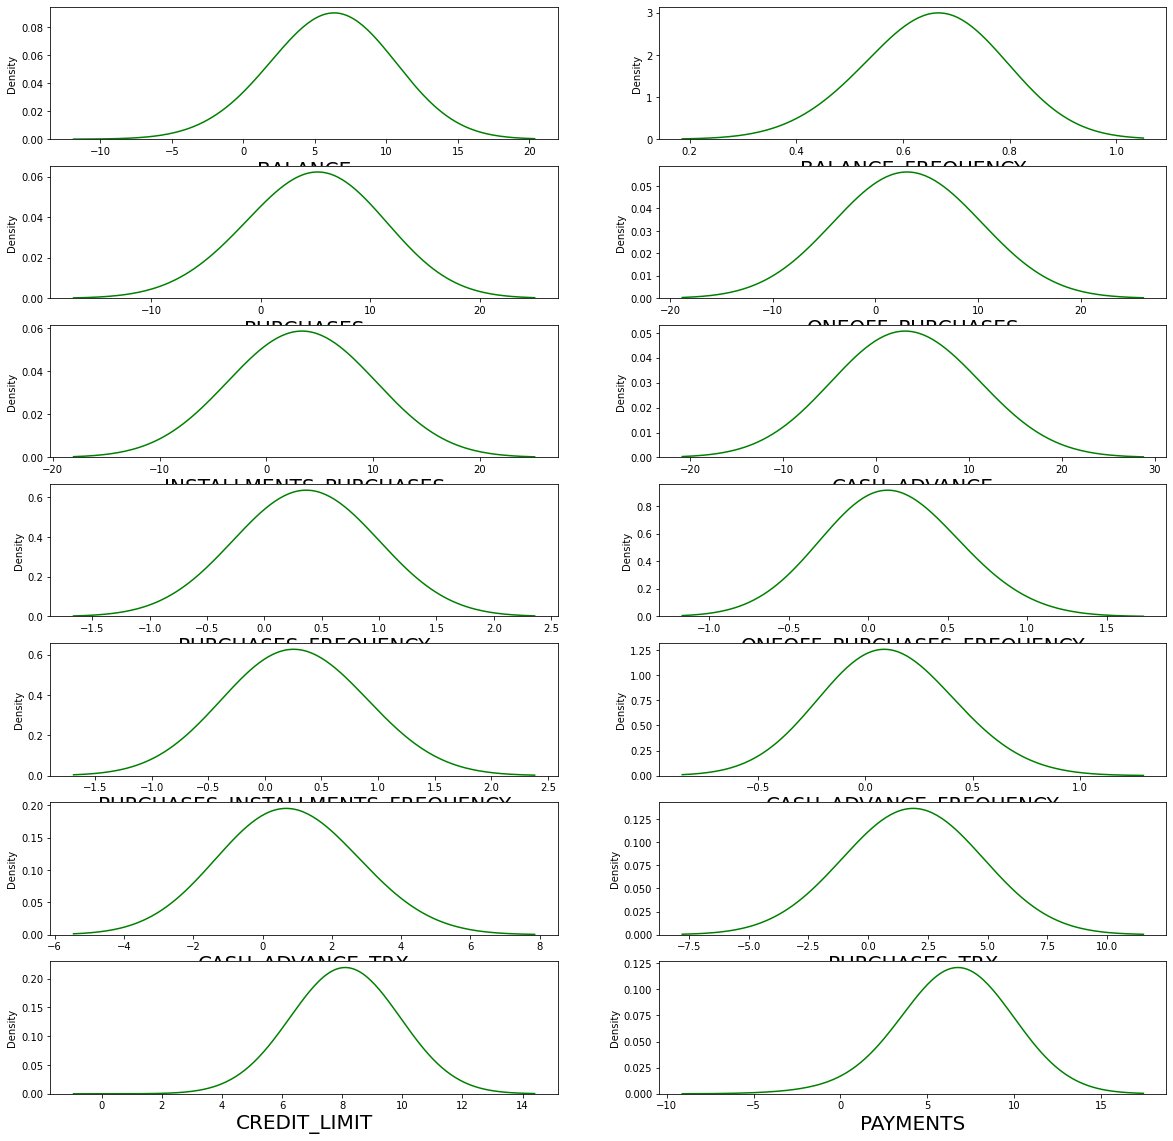

In [187]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1
for c in df:
    if plotnumber<=14 :
        ax = plt.subplot(7,2,plotnumber)
        sns.kdeplot(df[c],bw=2,color='g')
        plt.xlabel(c,fontsize=20)
    plotnumber+=1
plt.show()

### Standard Scaler
Just like the MinMax Scaler, the Standard Scaler is another popular scaler that is very easy to understand and implement.

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [214]:

df_scaled=df.copy()
scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled1= pd.DataFrame(scaler.transform(df_scaled),columns = df_scaled.columns)
df_scaled1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -1.213239          -0.986962  -0.098224         -0.998219   
1     0.978477          -0.167811  -1.699315         -0.998219   
2     0.852390           0.613226   0.631889          1.124418   
3     0.648556          -1.897302   0.863695          1.323691   
4     0.288997           0.613226  -0.706379         -0.094120   
...        ...                ...        ...               ...   
8944 -1.390698           0.613226   0.290319         -0.998219   
8945 -1.582402           0.613226   0.300814         -0.998219   
8946 -1.486541          -0.847636   0.045810         -0.998219   
8947 -1.751017          -0.847636  -1.699315         -0.998219   
8948 -0.107360          -1.897302   0.753161          1.234839   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.421725     -0.936998            -0.747076   
1                  -1.096607      1.346073            -1.302995   
2                  -1.096607     -0.936998             1.196721   
3                  -1.096607      0.597578            -1.014336   
4                  -1.096607     -0.936998            -1.014336   
...                      ...           ...                  ...   
8944                0.790185     -0.936998             1.196721   
8945                0.800137     -0.936998             1.196721   
8946                0.558314     -0.936998             0.882929   
8947               -1.096607      0.106616            -1.302995   
8948               -1.096607      0.459611             0.539211   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.764516                         -0.674357   
1                      -0.764516                         -0.958359   
2                       2.102938                         -0.958359   
3                      -0.354381                         -0.958359   
4                      -0.354381                         -0.958359   
...                          ...                               ...   
8944                   -0.764516                          1.192296   
8945                   -0.764516                          1.192296   
8946                   -0.764516                          0.854123   
8947                   -0.764516                         -0.958359   
8948                    1.852939                         -0.958359   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.761670         -0.846944      -0.579523     -1.457551   
1                   0.810314          0.922619      -1.426007      0.942158   
2                  -0.761670         -0.846944       0.550295      1.027266   
3                  -0.197793         -0.084835      -0.891935      1.027266   
4                  -0.761670         -0.846944      -0.891935     -1.232817   
...                      ...               ...            ...           ...   
8944               -0.761670         -0.846944       0.073323     -1.457551   
8945               -0.761670         -0.846944       0.073323     -1.457551   
8946               -0.761670         -0.846944      -0.045450     -1.457551   
8947                0.324280          0.360971      -1.426007     -2.311489   
8948                1.264968          0.360971       1.022695     -1.232817   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    -0.831122         -0.893545         -0.638646     0.0  
1     1.149630          1.019558          1.043355     0.0  
2    -0.091888          0.515667         -0.638646     0.0  
3    -4.329783          0.816733         -0.638646     0.0  
4    -0.034945         -0.367385         -0.638646     0.0  
...        ...               ...               ...     ...  
8944 -0.517304         -1.867883          1.921031     0.0  
8945 -0.626107          0.816733         -0.638646     0.0  
8946 -1.425325         -1.384143          1.231722     0.0  
8947 -1.7


## 5. <a name="4">Dimensionality Reduction</a>

- **1-PCA** </br>
Principal Components Analysis is arguably one of the most important algorithms used in data preprocessing, in a large number of applications. PCA is a linear algorithm. It essentially amounts to taking a linear combination of the original data in a clever way, which can help bring non-obvious patterns in the data to the fore

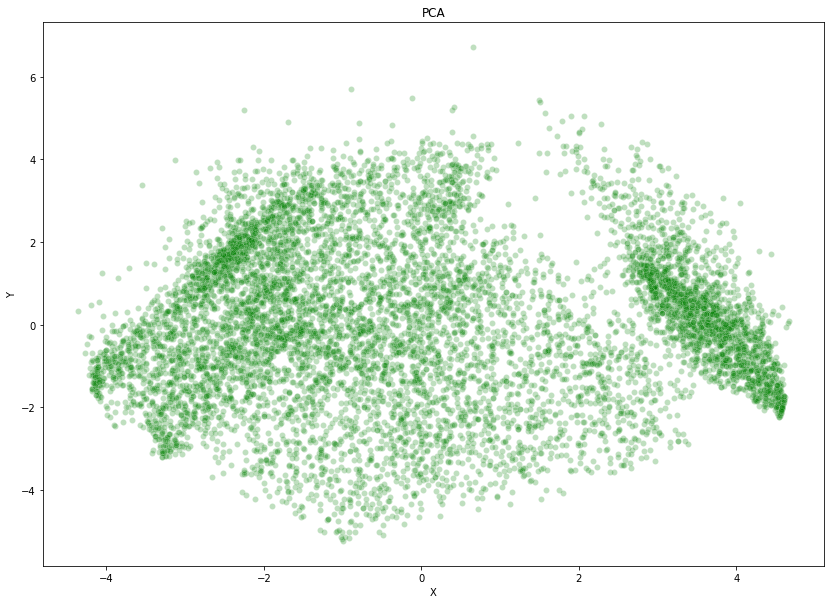

In [218]:
pca = PCA(3).fit(df_scaled1)
X_PCA = pca.transform(df_scaled1)
fig, ax = plt.subplots(figsize=(14, 10))

sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], alpha=0.25, ax=ax,color='g')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("PCA")
plt.show()

- **2- Kernel PCA**</br> is an extension of PCA that allows for the separability of nonlinear data by making use of kernels. The basic idea behind it is to project the linearly inseparable data onto a higher dimensional space where it becomes linearly separable.

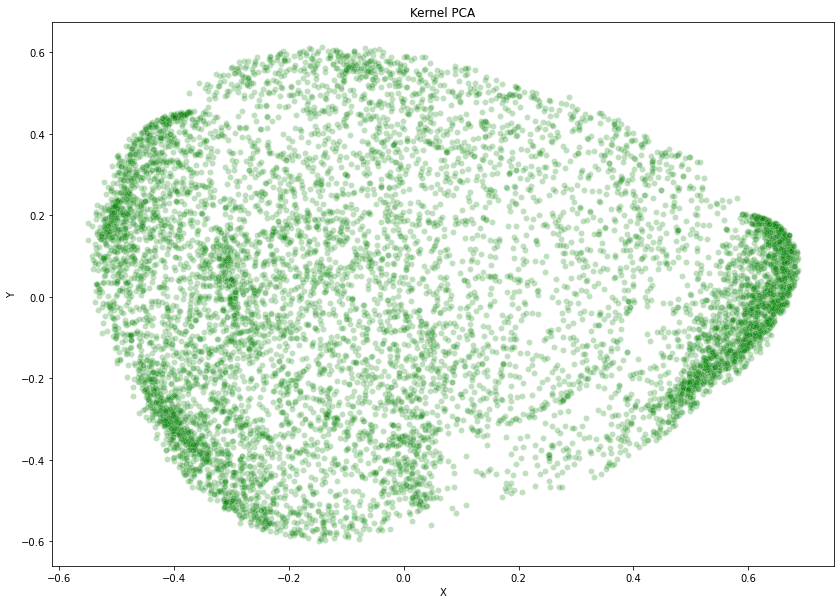

In [220]:
kpca = KernelPCA(2, kernel="rbf", gamma=0.03).fit(df_scaled1)
X_KPCA = kpca.transform(df_scaled1)
fig, ax = plt.subplots(figsize=(14, 10))

sns.scatterplot(x=X_KPCA[:, 0], y=X_KPCA[:, 1], alpha=0.25, ax=ax,color='g')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Kernel PCA")
plt.show()

We can see that Kernel PCA does a much better job separating the points than regular PCA.

So, how many components do we need?

i chosse 10 component

In [221]:
kpca = KernelPCA(10, kernel="rbf", gamma=0.03).fit(df_scaled1)
df_scaled1_KPCA = kpca.transform(df_scaled1)

## 6. <a name="1">Performance Metrics</a>

- **1-Silhouette Score** </br>
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)
where
a= average intra-cluster distance i.e the average distance between each point within a cluster.
b= average inter-cluster distance i.e the average distance between all clusters.

- **2-Rand Index**</br>
Another commonly used metric is the Rand Index. It computes a similarity measure between two clusters by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
The RI can range from zero to 1, a perfect match.
The only drawback of Rand Index is that it assumes that we can find the ground-truth clusters labels and use them to compare the performance of our model, so it is much less useful than the Silhouette Score for pure Unsupervised Learning tasks.

- **3-Davies-Bouldin Index** </br>
The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. Similarity is the ratio of within-cluster distances to between-cluster distances. In this way, clusters which are farther apart and less dispersed will lead to a better score.
The minimum score is zero, and differently from most performance metrics, the lower values the better clustering performance.
Similarly to the Silhouette Score, the D-B Index does not require the a-priori knowledge of the ground-truth labels, but has a simpler implementation in terms of fomulation than Silhouette Score.

- **4-Elbow Curve Method**</br>
The elbow method runs k-means clustering on the dataset for a range of values of k (say 1 to 10).
Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.
Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).
Let us see the python code with the help of an example.

## 7. <a name="1">Clustring Algorithms</a>

### kmeans

- **1-kmeans**
K-means is one of the most commonly used clustering algorithms. It can cluster large-scale data quickly and effectively. “K” refers to the fixed number of clusters needed before starting the algorithm.

The K-means clustering method divides a dataset consisting of N data objects into K clusters given as input parameters. The aim is to ensure that the clusters obtained at the end of the partitioning process have maximum similarities within clusters and minimum similarities between clusters.

In [235]:
from sklearn.cluster import KMeans
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(df_scaled1_KPCA)
    wss.append(k_means.inertia_)
    print(f"The inertia of {i} clusters : {k_means.inertia_}")

The inertia of 1 clusters : 3777.7513669345176
The inertia of 2 clusters : 2777.230450997882
The inertia of 3 clusters : 2300.7928201647637
The inertia of 4 clusters : 1987.9697852848894
The inertia of 5 clusters : 1719.6517114407518
The inertia of 6 clusters : 1550.3158566847014
The inertia of 7 clusters : 1430.3594354018794
The inertia of 8 clusters : 1317.9305054670447
The inertia of 9 clusters : 1231.149584360827
The inertia of 10 clusters : 1151.0190428172482


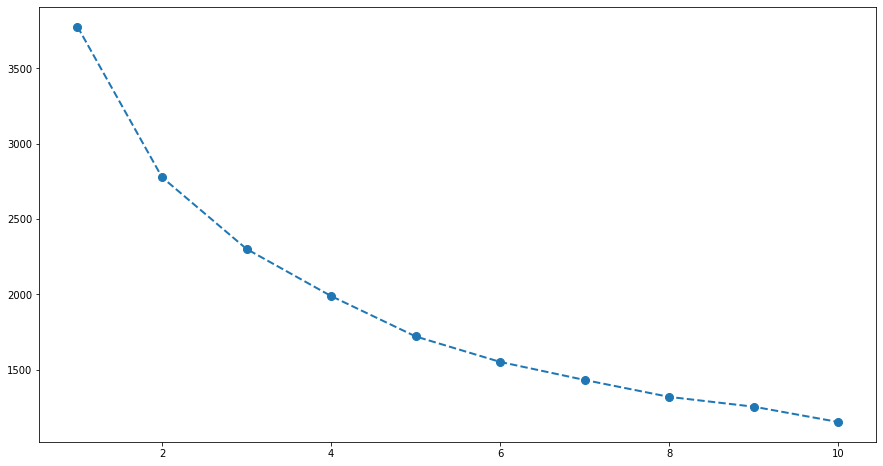

In [234]:
plt.plot(range(1,11),wss, marker='o', linestyle='dashed',
     linewidth=2, markersize=8)

Observations:
From the above plot, we can see, there is a sharp decrease in the inertia from cluster = 1 till cluster= 5, Hence we can  choose 5 clusters. 

In [299]:
sil_score = []
for i in range(2,8):
    k_means = KMeans(n_clusters = i,random_state = 123)
    l=k_means.fit(df_scaled1_KPCA)
    # print(l)
    labels = k_means.labels_
    score = silhouette_score(df_scaled1_KPCA,labels, random_state = 123)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")
   

The Silhouette Score of 2 clusters : 0.26069134149014045
The Silhouette Score of 3 clusters : 0.25164421192478204
The Silhouette Score of 4 clusters : 0.2606772700203634
The Silhouette Score of 5 clusters : 0.2748851172764147
The Silhouette Score of 6 clusters : 0.27946861389206484
The Silhouette Score of 7 clusters : 0.2789053017098459


**t-SNE** </br>
- What is t-SNE? </br>
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.
- How t-SNE works </br>
 Now that we know why we might use t-SNE over PCA, lets discuss how t-SNE works. The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.


In [261]:
embeddings = TSNE(perplexity=3, init="pca").fit_transform(df_scaled1_KPCA)
def plot_tsne(embeddings, labels, title):
    """Scatter plot for 2 t-SNE embeddings"""

    fig, ax = plt.subplots(figsize=(14, 10))

    sns.scatterplot(
        x=embeddings[:, 0],
        y=embeddings[:, 1],
        hue=labels,
        palette=sns.color_palette("colorblind", len(set(labels))),
        alpha=0.3,
        legend="full"
    )

    plt.xlabel("Embedding 0")
    plt.ylabel("Embedding 1")
    plt.title(title)
    plt.show()

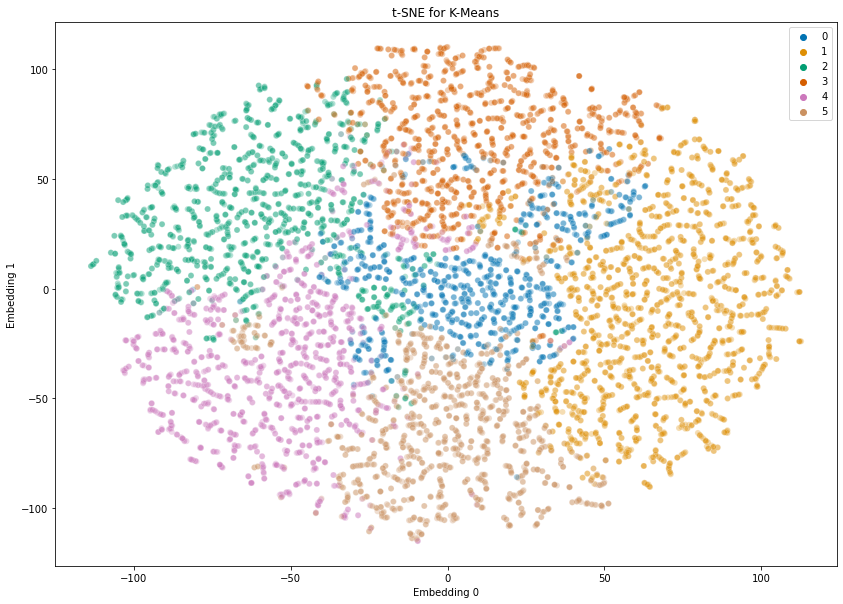

In [263]:
kmeans = KMeans(6, random_state=1).fit(df_scaled1_KPCA)
plot_tsne(embeddings=embeddings, labels=kmeans.labels_, title="t-SNE for K-Means")

### Hierarchical clustering
Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are  merged as one moves up the hierarchy.
- Divisive : This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

Dendograms are used to divide a given cluster into many different clusters.

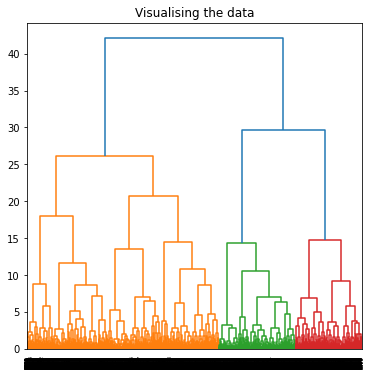

In [255]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(df_scaled1_KPCA, method ='ward'))) 

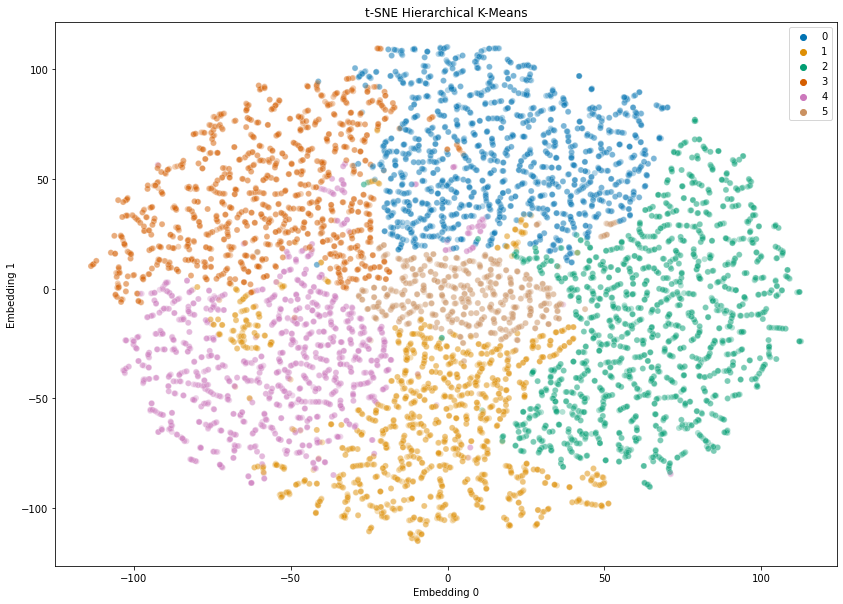

In [290]:
agg = AgglomerativeClustering(n_clusters=6).fit(df_scaled1_KPCA)
plot_tsne(embeddings=embeddings, labels=agg.labels_, title="t-SNE Hierarchical K-Means")

In [267]:
sil_score = []
for i in range(2,8):
    agg = AgglomerativeClustering(n_clusters=6).fit(df_scaled1_KPCA)
    # print(l)
    labels = agg.labels_
    score = silhouette_score(df_scaled1_KPCA,labels, random_state = 123)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")

The Silhouette Score of 2 clusters : 0.2306957516346234
The Silhouette Score of 3 clusters : 0.2306957516346234
The Silhouette Score of 4 clusters : 0.2306957516346234
The Silhouette Score of 5 clusters : 0.2306957516346234
The Silhouette Score of 6 clusters : 0.2306957516346234
The Silhouette Score of 7 clusters : 0.2306957516346234


### Gaussian mixture models </br>
Probabilistic model that assumes all the data points are generated from a mixture of a finite number of gaussian distributions. The algorithms try to recover the original gaussian that generated this distribution. To do so it uses the expectation-maximization (EM) algorithm, which initialize a random of n initial gaussian distribution and then tweaks the parameters looking for a combination that maximizes the likelihood of the points being generated by that distribution.

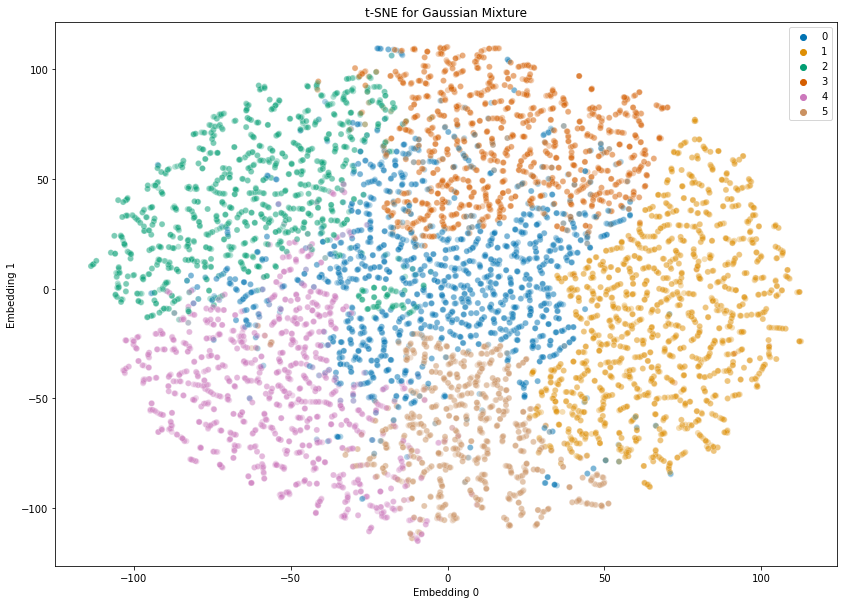

In [303]:
gauss_mix = GaussianMixture(6, random_state=1).fit(df_scaled1_KPCA)
plot_tsne(
    embeddings=embeddings,
    labels=gauss_mix.predict(df_scaled1_KPCA),
    title="t-SNE for Gaussian Mixture",
)

## 8. <a href="#6">Anomaly detection algorithm</a>

-  1-Mean Shift </br>
is falling under the category of a clustering algorithm in contrast of Unsupervised learning that assigns the data points to the clusters iteratively by shifting points towards the mode (mode is the highest density of data points in the region, in the context of the Meanshift). As such, it is also known as the Mode-seeking algorithm. Mean-shift algorithm has applications in the field of image processing and computer vision.

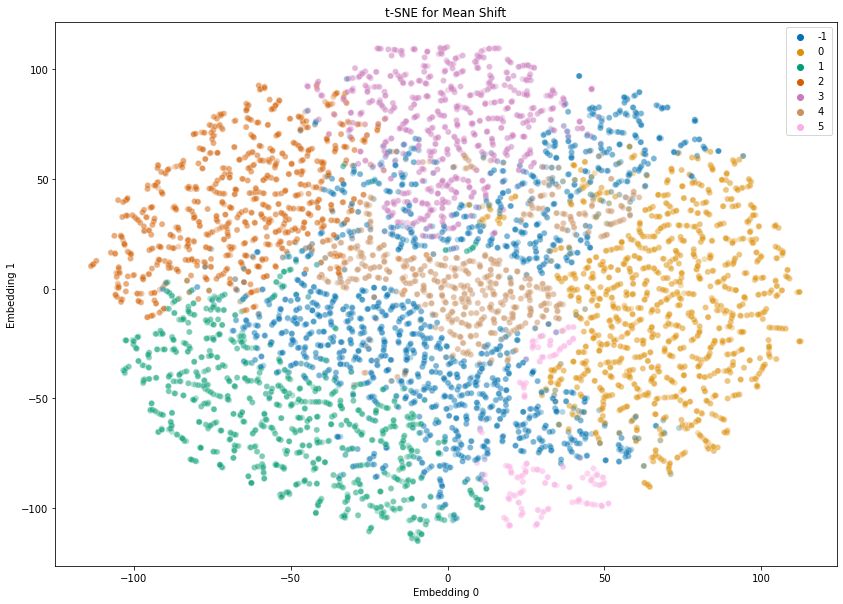

In [306]:
ms= MeanShift(bandwidth=0.5, cluster_all=False, n_jobs=6).fit(df_scaled1_KPCA)
plot_tsne(embeddings=embeddings, labels=ms.labels_, title="t-SNE for Mean Shift")

In [311]:
pd.DataFrame(ms.labels_).value_counts()

-1    2417
 0    1799
 1    1314
 2    1230
 3    1022
 4     904
 5     263
dtype: int64

- 2-DBSCAN
How can we detect anomalies in the test data?

The approach I’ve followed to classify the point as anomalous or not is the following:
1 — Calculate the distance from the new points to all the Core points (only the Core points, since they are the ones actually defining the clusters) and look for the minimum (distance to the closest neighbor inside a cluster).
2 — Compare the distance to the closest neighbor inside a cluster with eps, since this is the limit between two points to be consider neighbors, this way, we find if any of the Core points are actually neighbors with our test data.
3 — If the distance is larger than eps the point is labeled as anomalous, since it has no neighbors in the clusters.

[-1 -1 -1 ... -1 -1 -1]


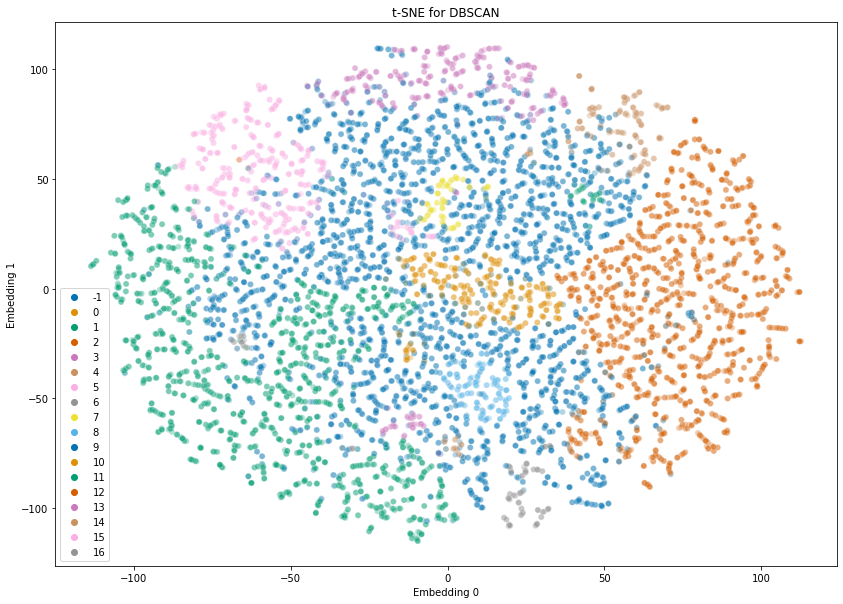

In [289]:
# db = DBSCAN(eps=11, min_samples=6,n_jobs=6).fit(df_scaled1_KPCA)
dbscan = DBSCAN(0.161, min_samples=20, n_jobs=6).fit(df_scaled1_KPCA)
dbscan_pred = ms.labels_.copy()
dbscan_pred[dbscan.labels_ == -1] = -1
f=dbscan.labels_
print(f[dbscan.labels_==-1])
plot_tsne(embeddings=embeddings, labels=dbscan.labels_, title="t-SNE for DBSCAN")

In [310]:
pd.DataFrame(dbscan.labels_).value_counts()

-1     6778
 2     1168
 5      317
 0      196
 4      130
 1       83
 7       82
 3       47
 6       40
 8       32
 9       31
 10      24
 11      21
dtype: int64

- 3-**Gaussian mixture models** </br>
Probabilistic model that assumes all the data points are generated from a mixture of a finite number of gaussian distributions. The algorithms try to recover the original gaussian that generated this distribution. To do so it uses the expectation-maximization (EM) algorithm, which initialize a random of n initial gaussian distribution and then tweaks the parameters looking for a combination that maximizes the likelihood of the points being generated by that distribution.

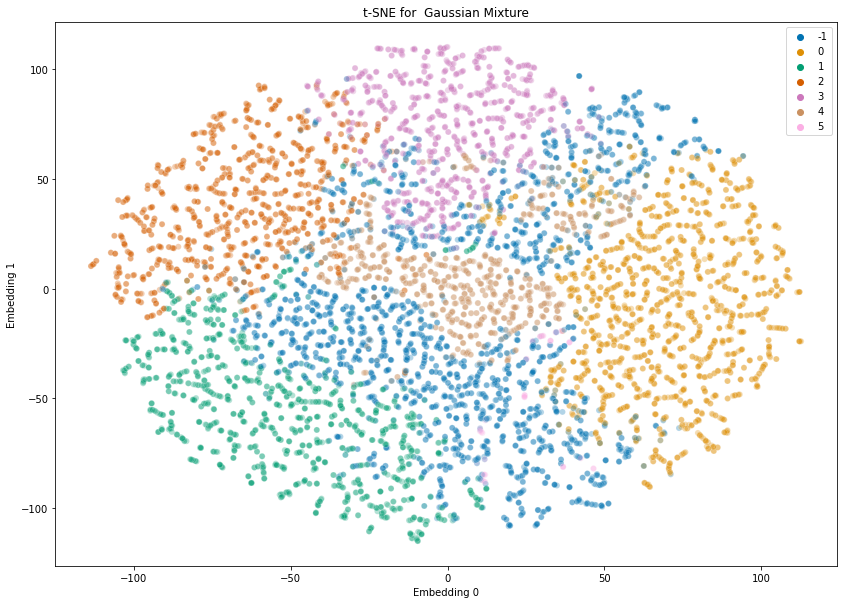

In [309]:
gauss_mix = GaussianMixture(random_state=1).fit(df_scaled1_KPCA)
scores = gauss_mix.score_samples(df_scaled1_KPCA)
thresh = np.quantile(scores, 0.03)
gauss_mix_pred = ms.labels_.copy()
gauss_mix_pred[scores <= thresh] = -1
plot_tsne(
    embeddings=embeddings,
    labels=gauss_mix_pred,
    title="t-SNE for  Gaussian Mixture"
)

- 2-Isolation Forest
- What is Isolation Forest?
Isolation Forest is used for outlier/anomaly detection
Isolation Forest is an Unsupervised Learning technique (does not need label)
Uses Binary Decision Trees bagging (resembles Random Forest, in supervised learning)

- Brief description
Isolation Forest builds an ensemble of Binary Trees for a given dataset. Anomalies, due to their nature, they have the shortest path in the trees than normal instances.

Isolation Forest converges quickly with a very small number of trees and subsampling enables us to achieve good results while being computationally efficient.

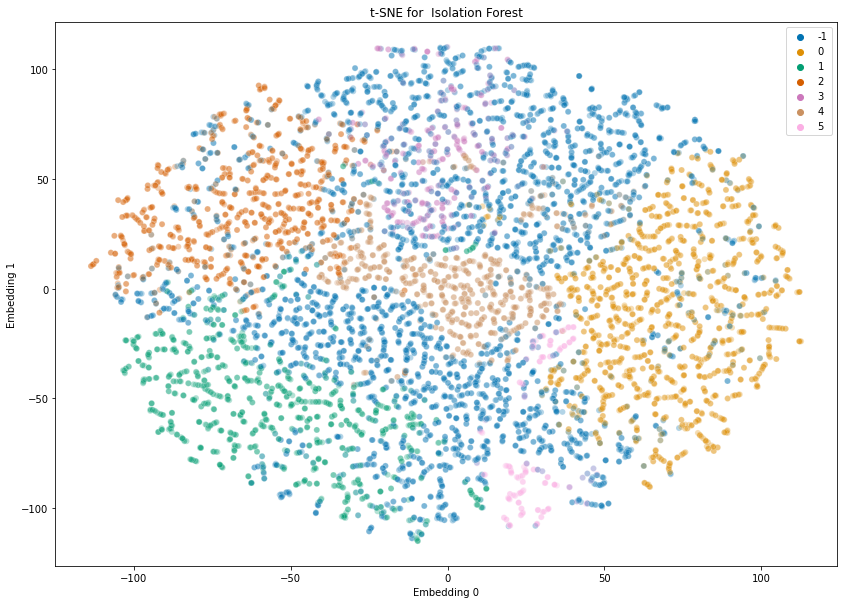

In [308]:
iso_forest = IsolationForest(max_samples=0.9, n_jobs=-1, random_state=1).fit(X_KPCA)
iso_forest_pred = ms.labels_.copy()
iso_forest_pred[iso_forest.predict(X_KPCA) == -1] = -1
plot_tsne(
    embeddings=embeddings,
    labels=iso_forest_pred,
    title="t-SNE for  Isolation Forest"
)

## 9. <a name="1">References</a>


- https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
- https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29
- https://towardsdatascience.com/best-clustering-algorithms-for-anomaly-detection-d5b7412537c8
- https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
- https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/
- https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
- https://towardsdatascience.com/isolation-forest-from-scratch-e7e5978e6f4c